In [73]:
# Import necessary libraries for querying Arxiv, Wikipedia, and Tavily
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper
from langchain_community.tools.tavily_search import TavilySearchResults

In [74]:
# Initialize API wrappers for Arxiv and Wikipedia with specific configurations
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=1000)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query Arxiv papers")
api_wrapper_wikipedia = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=1000)
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia, description="Query Wikipedia")

# Initialize Tavily search results tool
tavily = TavilySearchResults()

In [75]:
# Load environment variables from a .env file
from dotenv import load_dotenv
load_dotenv()

import os

# Set API keys for GROQ and Tavily from environment variables
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [76]:
# Combine all tools into a single list for use with the LLM
tools = [
    arxiv,
    wikipedia,
    tavily
]

In [77]:
# Import and initialize the ChatGroq LLM
from langchain_groq import ChatGroq

# Configure the LLM with a specific model
llm = ChatGroq(model="qwen-qwq-32b")

# Bind the tools to the LLM for enhanced functionality
llm_with_tools = llm.bind_tools(tools)

In [78]:
# Example invocation of the LLM with tools to process a query
llm_with_tools.invoke("India vs pak war today date")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_yxsc', 'function': {'arguments': '{"query": "India vs pak war today date"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 131, 'prompt_tokens': 320, 'total_tokens': 451, 'completion_time': 0.319156076, 'prompt_time': 0.022764669, 'queue_time': 0.24802354099999996, 'total_time': 0.341920745}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--066eb3e9-1358-4f13-9793-817a195595e3-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'India vs pak war today date'}, 'id': 'call_yxsc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 320, 'output_tokens': 131, 'total_tokens': 451})

In [79]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [80]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [81]:
from IPython.display import display, Image
from langgraph.graph import  StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

In [82]:
def tool_calling_llm(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [91]:
# Create a StateGraph instance with the defined State type
builder = StateGraph(State)

# Add nodes to the graph
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# Define edges between nodes
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_conditional_edges("tools", tool_calling_llm)
builder.add_edge("tools", END)

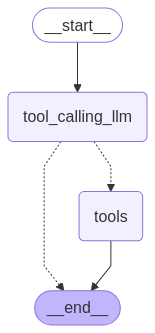

In [ ]:
# Compile the graph and display its visualization
graph_builder = builder.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [93]:
# Invoke the graph with a specific message and display the results
message = graph_builder.invoke({"messages": "IND vs PAK war today date and llm research paper"})
for m in message["messages"]:
   m.pretty_print()

================================ Human Message =================================

IND vs PAK war today date and llm research paper
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_5r70)
 Call ID: call_5r70
  Args:
    query: IND vs PAK war today date
  arxiv (call_asey)
 Call ID: call_asey
  Args:
    query: large language models research papers
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Indo-Pakistani wars and conflicts - Wikipedia", "url": "https://en.wikipedia.org/wiki/Indo-Pakistani_wars_and_conflicts", "content": "The 2025 India–Pakistan conflict was a brief but intense armed confrontation between India and Pakistan on 7 May 2025, triggered by India's missile strikes on Pakistan under the codename Operation Sindoor.[b] The operation was launched in retaliation for the 2025 Pahalgam attack, in which 28 civilians, mostly t

In [94]:
# Invoke the graph with another message and display the results
message = graph_builder.invoke({"messages": "Hi my name is srikar"})
for m in message["messages"]:
   m.pretty_print()

================================ Human Message =================================

Hi my name is srikar
================================== Ai Message ==================================

Hello Srikar! Nice to meet you. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific.


In [1]:
from langgraph.graph.visualization import MermaidDrawMethod


ModuleNotFoundError: No module named 'langgraph.graph.visualization'